### `Import Library`

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


### `Config`

In [2]:
# from google.colab import drive

# drive.mount('/content/drive')
# working_path = '/content/drive/MyDrive/Tubes Machine  Deep Learning'
# file_path = ['le-dataset-resize-16.csv', 'le-dataset-resize-32.csv', 'le-dataset-resize-64.csv', 'le-dataset-resize-128.csv']

In [14]:
working_path = "D:/Semester 5/MachineORDeep Learning/Final Project"
# file_path = ['le-dataset-resize-16.csv', 'le-dataset-resize-32.csv', 'le-dataset-resize-64.csv', 'le-dataset-resize-128.csv']
file_path = ['encoded-dogcat-img-16.csv', 'encoded-dogcat-img-32.csv', 'encoded-dogcat-img-64.csv', 'encoded-dogcat-img-128.csv']

In [10]:
lda = LinearDiscriminantAnalysis(n_components=1)  

models = []
accuracies = []
histories = []

### `Function`

In [15]:
def pre_build_model(file, working_path, lda, random_state=42):
    df = pd.read_csv(f'{working_path}/dataset/dogcat-encode//{file}')
    df = df.iloc[:, 1:]

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1:]

    X_lda = lda.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=random_state)

    return X_train, X_test, y_train, y_test

### `Build Model`

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
def set_callbacks(model_name):
    callbacks = [
    # Early stopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi setelah beberapa epoch
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    
    # ModelCheckpoint untuk menyimpan model dengan akurasi validasi terbaik
    ModelCheckpoint(f'{model_name}.h5', monitor='val_accuracy', save_best_only=True)
    ]
    return callbacks

In [25]:
callback = set_callbacks("model-def-eksfet")

for i, file in enumerate(file_path):
  X_train, X_test, y_train, y_test = pre_build_model(file, working_path, lda, random_state=42)

  # Inisialisasi model sequential
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu'),  # Layer input dengan 50 neuron
      tf.keras.layers.Dense(50, activation='relu'),  # Layer tersembunyi dengan 50 neuron
      tf.keras.layers.Dense(4, activation='softmax')  # Layer output dengan 4 neuron untuk klasifikasi
  ])

  # Compile model
  model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
    callbacks=callback
    )

  # # Latih model
  # history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
  # models.append(model)
  # histories.append(history)

  # last_accuracy = history.history['val_accuracy'][-1]  # Mengambil akurasi validasi terakhir
  # accuracies.append(last_accuracy)


c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: Invalid keyword argument(s) in `compile()`: ({'callbacks'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

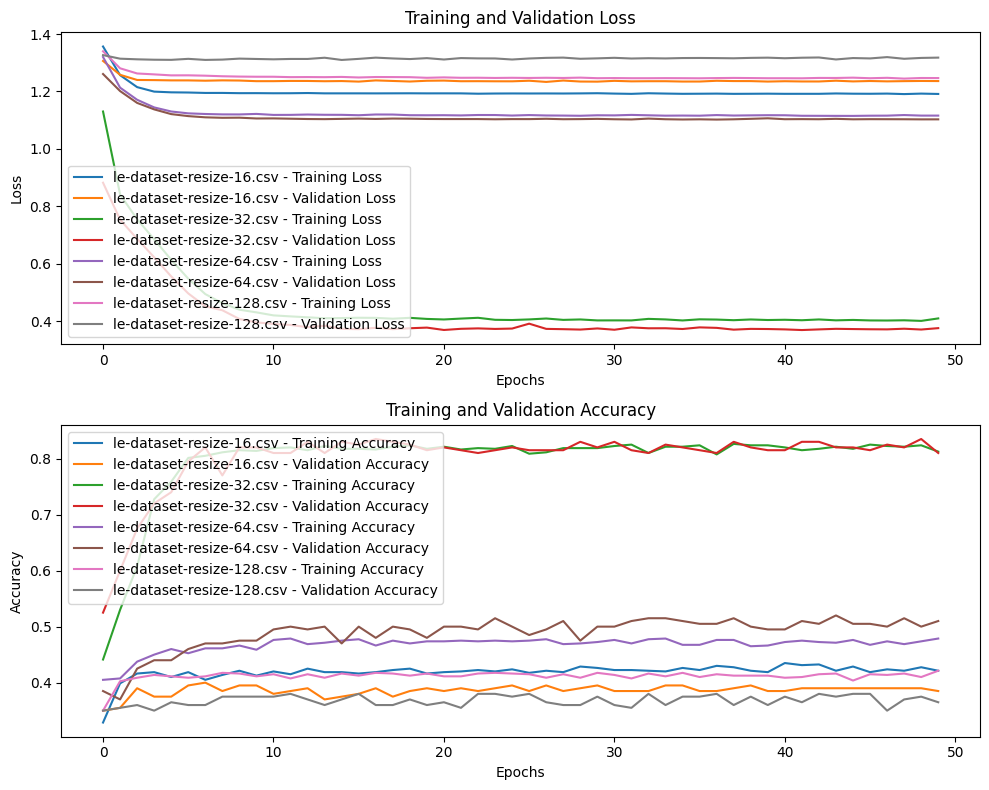

In [ ]:
# Plot loss
plt.figure(figsize=(10, 8))
for i, history in enumerate(histories):
    plt.subplot(2, 1, 1)  # Dua baris, satu kolom, plot pertama
    plt.plot(history.history['loss'], label=f'{file_path[i]} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{file_path[i]} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

# Plot akurasi
for i, history in enumerate(histories):
    plt.subplot(2, 1, 2)  # Dua baris, satu kolom, plot kedua
    plt.plot(history.history['accuracy'], label=f'{file_path[i]} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{file_path[i]} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
res_nn_model = pd.DataFrame({
    'dataset_source': file_path,
    'accuracy' : accuracies
})

res_nn_model.head()

,dataset_source,accuracy
0,le-dataset-resize-16.csv,0.385
1,le-dataset-resize-32.csv,0.810
2,le-dataset-resize-64.csv,0.510
3,le-dataset-resize-128.csv,0.365


In [ ]:
import pickle

for index, (m, f) in enumerate(zip(models, file_path)):
    # Misalkan 'model' adalah model yang ingin Anda simpan
    with open(f'{working_path}/{f}.pkl', 'wb') as file:
        pickle.dump(m, file)
    print(f"Saved {f}.pkl")

Saved le-dataset-resize-16.csv.pkl
Saved le-dataset-resize-32.csv.pkl
Saved le-dataset-resize-64.csv.pkl
Saved le-dataset-resize-128.csv.pkl
